In [1]:
import numpy as np
from scipy import linalg
import scipy.signal as signal
import matplotlib.image as mpimg
import pylab
import random
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def show_data(T, S):
    plt.plot(T, [S[0,i] for i in range(S.shape[1])], marker="*")
    plt.plot(T, [S[1,i] for i in range(S.shape[1])], marker="o")
    plt.show()

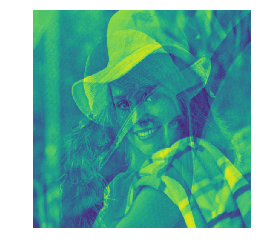

In [3]:
p1 = mpimg.imread('image1.png')
plt.imshow(p1)
p1 = np.reshape(p1,(512*512,1))
plt.axis('off')
plt.show()

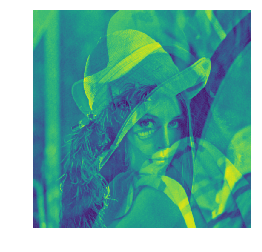

In [4]:
p2 = mpimg.imread('image2.png')
plt.imshow(p2)
p2 = np.reshape(p2,(512*512,1))
plt.axis('off')
plt.show()

In [5]:
p = np.append(p1, p2,axis=-1)
p = p.T
T = [i for i in range(0, 262144)]

In [6]:
def Whitening(X):
    #normalize X
    mean = X.mean(axis=-1)
    n = np.shape(X)
    for i in range(0,n[0]):
        for j in range(0,n[1]):
            X[i][j] = X[i][j] - mean[i]
    #whitening X to get z
    sigma = np.dot(X,X.T)
    d,E = linalg.eig(sigma)
    D = np.diag(1/d)
    V = np.dot(D,E.T)
    z = np.dot(V,X)
    return z

In [7]:
z = Whitening(p)
print("Shape of z is",np.shape(z))
#show_data(T,z)#show z1 & z2

Shape of z is (2, 262144)


In [8]:
def Decorrelation(W):#W <- (W*W.T)^(-0.5)*W to make W decorrelated
    d, e = linalg.eigh(np.dot(W, W.T))
    return np.dot(np.dot(e * (1. / np.sqrt(d)), e.T), W)

#I try a lot when w is [[ 0.7768532   0.38323983] [ 0.21723714  0.66516969]]
# it can get a good result of one of the source as source1
def Gerneratew(z):
    m = np.shape(z)[0]#use random (m,m) to make z 
    n = np.shape(z)[1]
    W = np.random.rand(m,m)
    W[0][0] =  0.7768532
    W[0][1] =  0.38323983
    W[1][0] = 0.21723714
    W[1][1] = 0.66516969
    print("Now we Generate Good W as",W)
    lim = 200
    for i in range(0,m):
        while lim > 0.00001:
            W[i] = W[i]/np.linalg.norm(W[i])
            Wold = W
            y = np.dot(W[i][:,np.newaxis],z[0][:, np.newaxis].T)
            W[i] = (z[i] * pow(y[0],3)).mean(axis=-1) - 3*W[i]
            W[i] = W[i]/np.linalg.norm(W[i])
            W = Decorrelation(W)
            lim = max( abs(abs(np.dot(W[i],Wold[i][:,np.newaxis])) - 1) )#vdo
    lim = 200
    while lim > 0.0001:
        Wold = W
        W = Decorrelation(W)
        lim = max( abs(abs(np.diag(np.dot(W, Wold.T))) - 1) )

    print("We did it!!!")    
    return W

In [9]:
W = Gerneratew(z)#record the W when get good W

Now we Generate Good W as [[ 0.7768532   0.38323983]
 [ 0.21723714  0.66516969]]
We did it!!!


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


In [10]:
y = np.dot(W,z)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


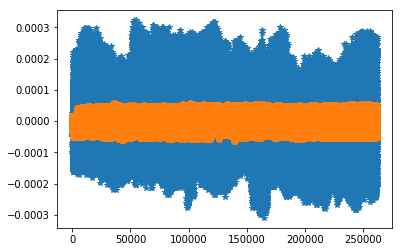

In [11]:
show_data(T,y)

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


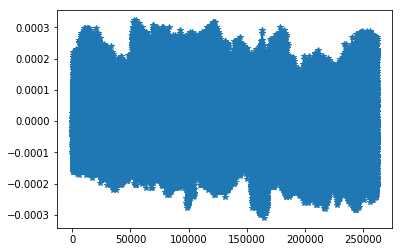

In [12]:
plt.plot(T, [y[0,i] for i in range(y.shape[1])], marker="*")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


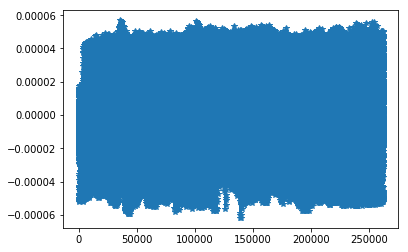

In [13]:
plt.plot(T, [y[1,i] for i in range(y.shape[1])], marker="*")
plt.show()

In [14]:
s1 = np.reshape(y[0],(512,512))

In [15]:
s2 = np.reshape(y[1],(512,512))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


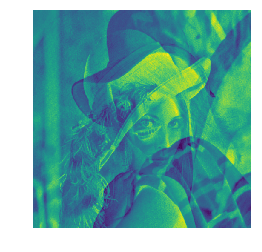

In [16]:
p1 = mpimg.imread('image1.png')
for i in range(0,512):
    for j in range(0,512):
        p1[i][j] = s1[i][j] 
plt.imshow(p1)
plt.axis('off')
plt.show()
plt.imsave('p1.png', p1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


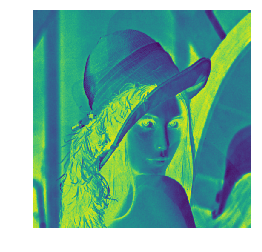

In [23]:
p2 = mpimg.imread('image2.png')
for i in range(0,512):
    for j in range(0,512):
        p2[i][j] = s2[i][j]
plt.imshow(p2)
plt.axis('off')
plt.show()
plt.imsave('p2.png', p2, cmap = plt.cm.gray_r)

In [24]:
p2 = mpimg.imread('image2.png')
for i in range(0,512):
    for j in range(0,512):
        p2[i][j] = s2[i][j]
plt.imsave('source1.png', p2, cmap = plt.cm.gray_r)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
